In [3]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import openpyxl
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_columns', 1000)
pd.set_option('max_row', 30)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [16]:
def FCV(X, y, regr, cv=10, seed=1010):
    #评价方法函数
    #其中regr表示回归方法，seed是随机种子，用来随机抽取9份
    #X和y是自变量和因变量
    np.random.seed(seed)
    ind = np.arange(len(y))
    np.random.shuffle(ind)  #随机化下标
    X_folds = np.array_split(X[ind], cv)
    y_folds = np.array_split(y[ind], cv)
    scores = list()
    nmse = list()
    for k in range(cv):
        X_train = list(X_folds)  #只有先list才能pop
        X_test = X_train.pop(k)  #从中取出k份
        X_train = np.concatenate(X_train)  #合并剩下的k-1份

        y_train = list(y_folds)  #只有先list才能pop
        y_test = y_train.pop(k)  #从中取出k份
        y_train = np.concatenate(y_train)  #合并剩下的k-1份

        regr.fit(X_train, y_train)
        #R的平方
        scores.append(regr.score(X_test, y_test))
        #标准化均方误差
        nmse.append(
            np.sum((y_test - regr.predict(X_test))**2) / np.sum((y_test - np.mean(y_test))**2)
        )
    return (np.mean(nmse), np.mean(scores))

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoLars, Lars, Lasso, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

w = pd.read_excel('./data/Concrete_Data.xls')
wn = w.columns
y = np.array(w[wn[-1]])
x = np.array(w[wn[:-1]])
names = [
    "N-Neighbors", "Lasso Lars", "Lars", "Larsso", "LinearRegression",
    "DecisionTreeRegressor", "RandomForestRegressorn", "AdaBoostRegressor",
    "BaggingRegressor", "SVR"
]
regressors = [
    KNeighborsRegressor(),
    LassoLars(),
    Lars(),
    Lasso(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100,
                          oob_score=True,
                          criterion='mse',
                          max_depth=None),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300),
    BaggingRegressor(),
    SVR(C=0.1, epsilon=0.2)
]
A = list()
for reg in regressors:
    A.append(FCV(x, y, reg, 10))

/Users/yangxiaohong/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yangxiaohong/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yangxiaohong/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yangxiaohong/op

<BarContainer object of 10 artists>

[Text(0, 0, 'N-Neighbors'),
 Text(0, 0, 'Lasso Lars'),
 Text(0, 0, 'Lars'),
 Text(0, 0, 'Larsso'),
 Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'DecisionTreeRegressor'),
 Text(0, 0, 'RandomForestRegressorn')]

Text(0, 0.5, 'Mean NMSE')

Text(0.5, 1.0, 'Mean NMSE')

<BarContainer object of 10 artists>

[Text(0, 0, 'N-Neighbors'),
 Text(0, 0, 'Lasso Lars'),
 Text(0, 0, 'Lars'),
 Text(0, 0, 'Larsso'),
 Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'DecisionTreeRegressor'),
 Text(0, 0, 'RandomForestRegressorn')]

Text(0, 0.5, 'Mean Score')

Text(0.5, 1.0, 'Mean Score')

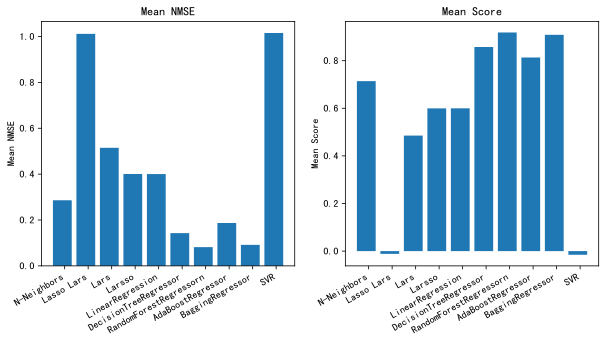

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.bar(np.arange(np.array(A).shape[0]), np.array(A)[:, 0])
ax.set_xticklabels(names)

ax.set_ylabel("Mean NMSE")
ax.set_title("Mean NMSE")
ax.set_xticks(np.arange(np.array(A).shape[0]) + 0.1)

bx = fig.add_subplot(122)
bx.bar(np.arange(np.array(A).shape[0]), np.array(A)[:, 1])
bx.set_xticklabels(names)
bx.set_ylabel("Mean Score")
bx.set_title("Mean Score")
bx.set_xticks(np.arange(np.array(A).shape[0]) + 0.1)
fig.autofmt_xdate()  #让标准回归方法斜体展示
plt.show()